<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Práctica 3. Análisis estadístico de señales EEG y EMG </center></font></h1>
<font  face="Courier New" size="3">
<p1><center> Angie Triana - Erika Gómez - Ana Carolina Mejía</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

In [7]:
!pip install pingouin

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns
from scipy import stats
import pingouin as pg


## Procedimiento

### 1. Implementación de funciones

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:

In [9]:
def valor_rms(señal): #Recibe un arreglo de numpy.
    valor_rms = np.sqrt(np.mean(señal**2)) #Da información sobre la energía de la señal
    return valor_rms

In [10]:
#Prueba
señal=np.array([1,2,3,4,5])

In [11]:
#Prueba
valor_rms=valor_rms(señal)

In [12]:
valor_rms

3.3166247903554

In [13]:
signal_data=sio.loadmat('signals.mat')

In [14]:
signal_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015',
 '__version__': '1.0',
 '__globals__': [],
 'Fs': array([[1024]], dtype=uint16),
 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
         4365.31103516, 4370.91796875]]),
 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
         -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]),
 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
         220.4135886 , 151.5810508 ]]),
 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
         -539.9349533 , -772.65519631]]),
 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
         1416.109375  , 1352.75012207]]),
 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
         -3791.24267578, -3924.6550293 , -4109.94433594]])}

In [15]:
print(signal_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])


In [16]:
ECG_asRecording=signal_data['ECG_asRecording']

In [17]:
ECG_asRecording.shape

(1, 30720)

In [18]:
duration = ECG_asRecording.shape[1]/1024 #Cada señal dura 30 segundos?

In [19]:
vector_time = tiempo = np.arange(0, duration, 1/1024)

In [20]:
periodo=1/1024

In [21]:
vector_time[0:1024]

array([0.00000000e+00, 9.76562500e-04, 1.95312500e-03, ...,
       9.97070312e-01, 9.98046875e-01, 9.99023438e-01])

In [22]:
vector_time[0:1024].size

1024

In [23]:
vector_time.size

30720

In [24]:
ECG_asRecording[0:29]

array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]])

In [25]:
time_vector=np.arange(1,30721)

In [26]:
ECG_reshape = ECG_asRecording.reshape(30720)

In [27]:
ECG_reshape.shape

(30720,)

In [28]:
1024*30

30720

In [29]:
signal_data['Fs']

array([[1024]], dtype=uint16)

In [30]:
ECG_filtered=signal_data['ECG_filtered']

In [31]:
ECG_filtered_reshape = ECG_filtered.reshape(30720)

In [32]:
ECG_filtered_reshape

array([ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
       -1.20952610e+02, -1.31734356e+02, -1.32898021e+02])

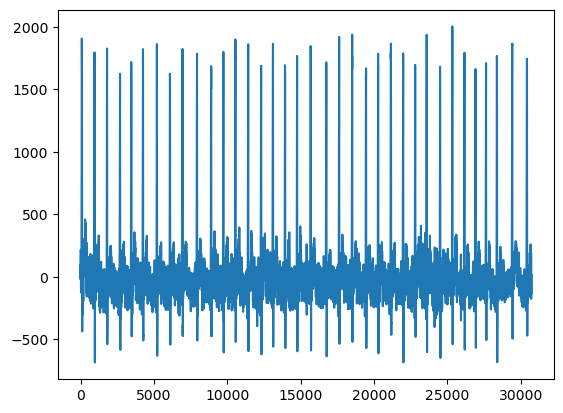

In [33]:
plt.plot(time_vector, ECG_filtered_reshape)

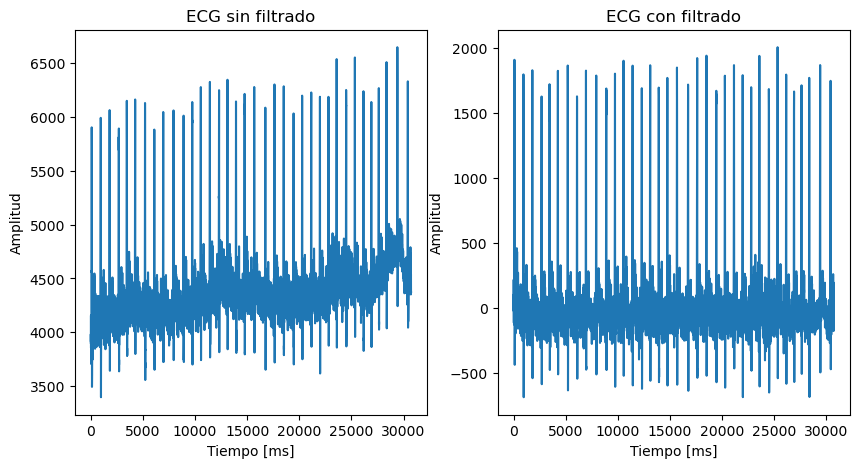

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('ECG sin filtrado')
plt.plot(time_vector, ECG_reshape)
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')

plt.subplot(1,2,2)
plt.title('ECG con filtrado')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')

plt.plot(time_vector, ECG_filtered_reshape)


In [35]:
# Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. 
# Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados

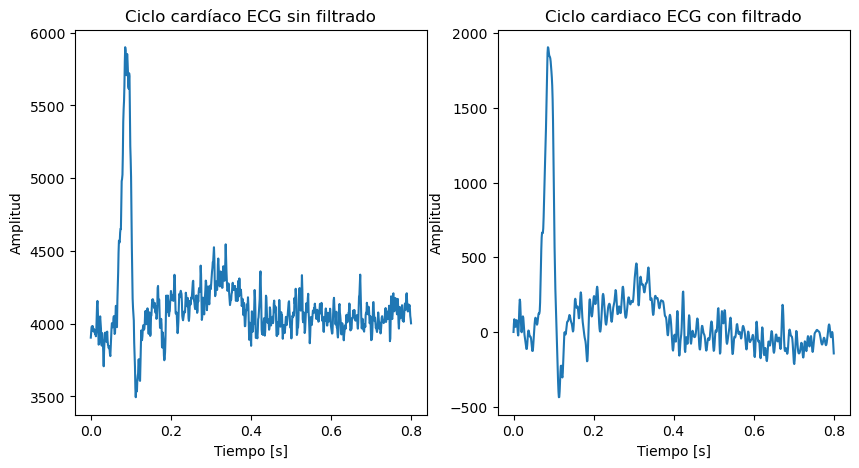

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Ciclo cardíaco ECG sin filtrado')
plt.plot(vector_time[0:820],ECG_reshape[0:820])
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(1,2,2)
plt.title('Ciclo cardiaco ECG con filtrado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.plot(vector_time[0:820],ECG_filtered_reshape[0:820])

plt.show()

In [37]:
ciclo_cardiaco_cruda = ECG_reshape[0:820]

In [38]:
promedio=ciclo_cardiaco_cruda.mean()
rms=valor_rms(ciclo_cardiaco_cruda)
ds=ciclo_cardiaco_cruda.std()

TypeError: 'numpy.float64' object is not callable

In [ ]:
promedio

4118.878040741711

In [ ]:
rms

4129.357203573384

In [ ]:
ds

293.9976193766254

In [ ]:
ciclo_cardiaco_filtrado= ECG_filtered_reshape[0:820]

In [ ]:
promedio_filtrado = ciclo_cardiaco_filtrado.mean()

In [ ]:
promedio_filtrado

92.32608916147845

In [ ]:
rms_filtrado=valor_rms(ciclo_cardiaco_filtrado)
ds_filtrado=ciclo_cardiaco_filtrado.std()

In [ ]:
rms_filtrado

324.92824339492785

In [ ]:
ds_filtrado

311.53532161836836

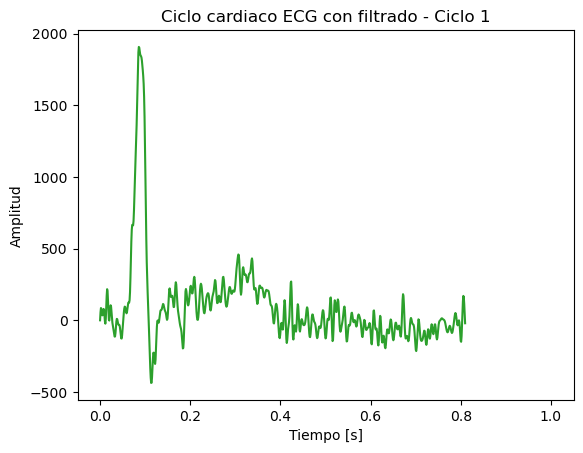

El promedio filtrado del ciclo 1 es: 91.65920147076987
La varianza es: 96058.50876697262


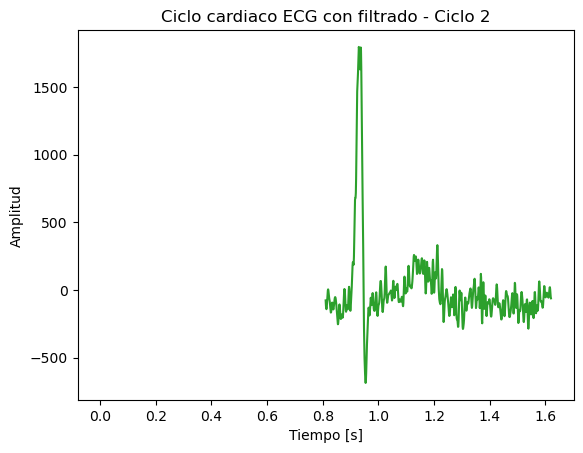

El promedio filtrado del ciclo 2 es: -6.765831098552691
La varianza es: 89428.03971627746


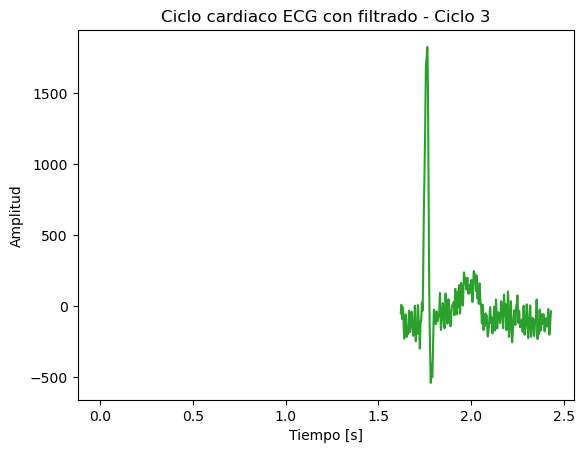

El promedio filtrado del ciclo 3 es: -9.09367633930534
La varianza es: 85853.63785672566


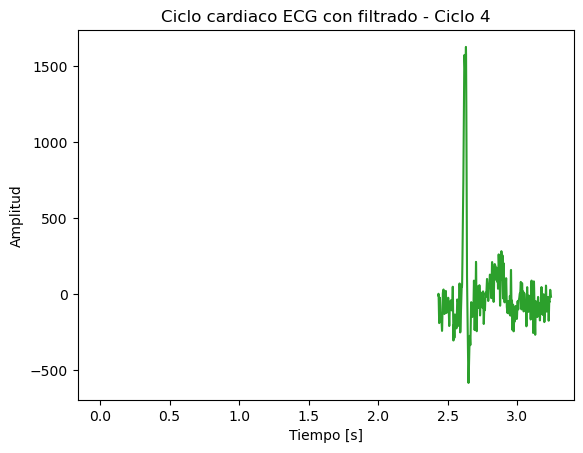

El promedio filtrado del ciclo 4 es: -7.507372468331985
La varianza es: 75569.21091204266


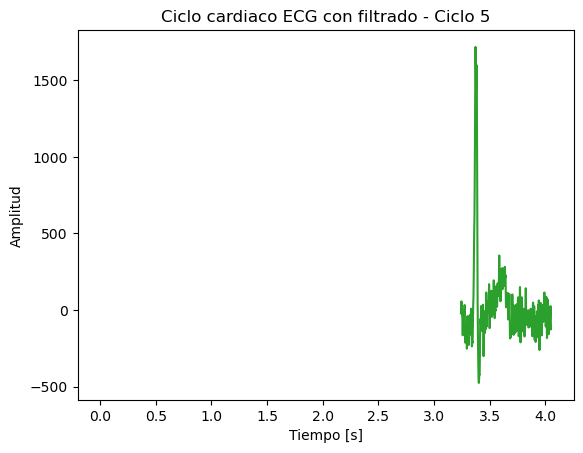

El promedio filtrado del ciclo 5 es: 15.283972294704816
La varianza es: 77005.14091123562


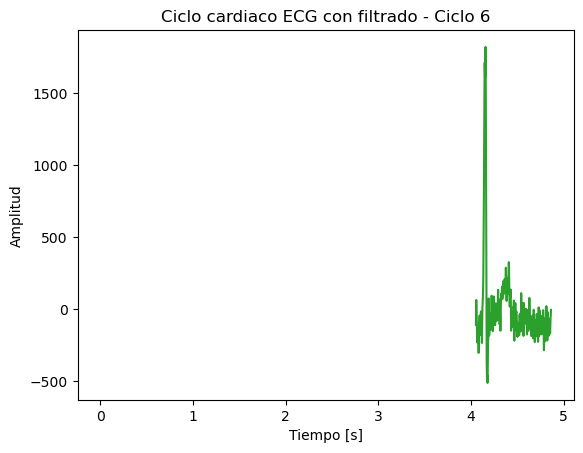

El promedio filtrado del ciclo 6 es: -5.688854059264578
La varianza es: 88381.23653336366


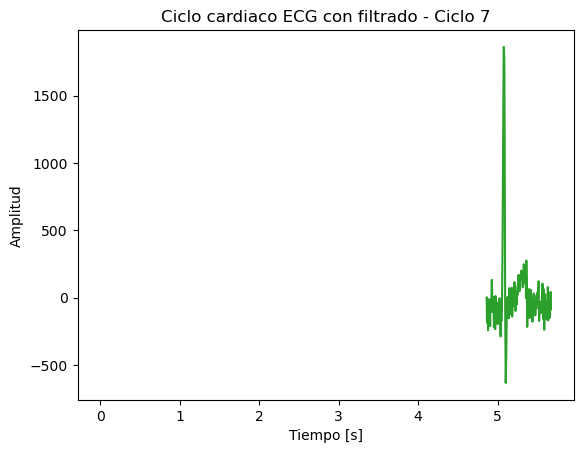

El promedio filtrado del ciclo 7 es: 11.489923702571867
La varianza es: 88625.35856295613


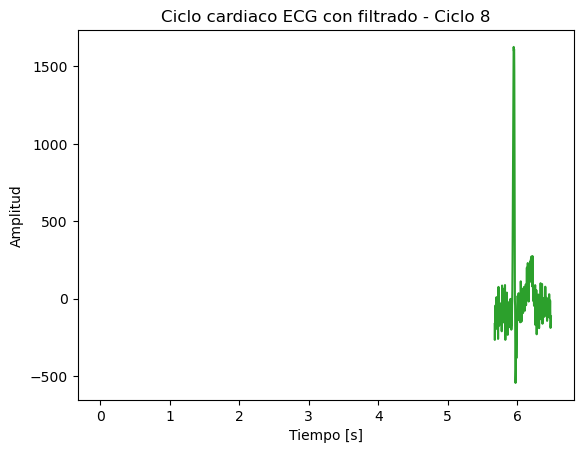

El promedio filtrado del ciclo 8 es: 1.5765751541260753
La varianza es: 73852.79438288443


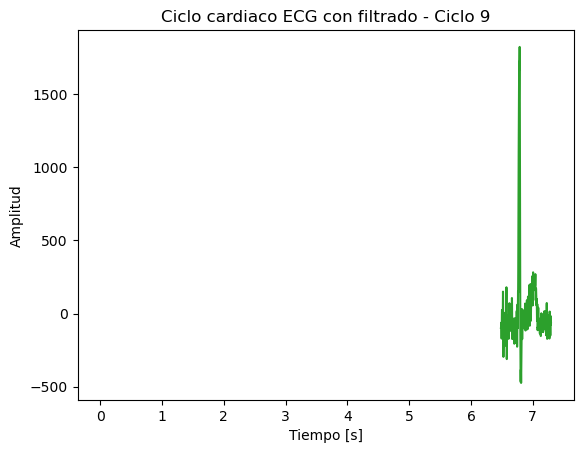

El promedio filtrado del ciclo 9 es: 12.826154617688765
La varianza es: 84640.88738157753


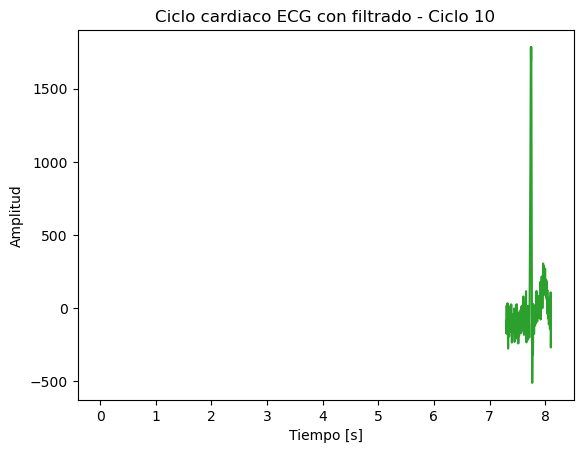

El promedio filtrado del ciclo 10 es: 7.036231714399396
La varianza es: 85632.87690547956


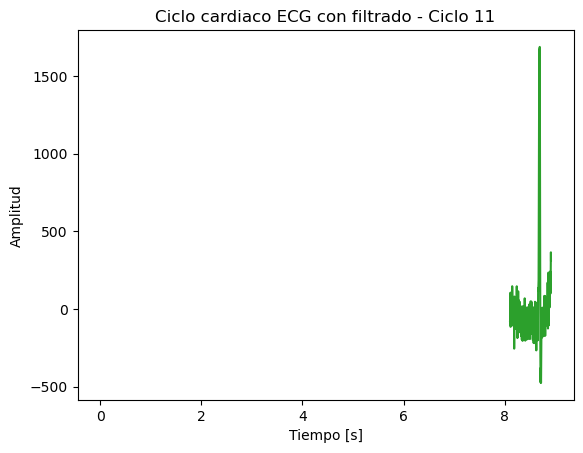

El promedio filtrado del ciclo 11 es: -8.273956389190321
La varianza es: 74808.77903549813


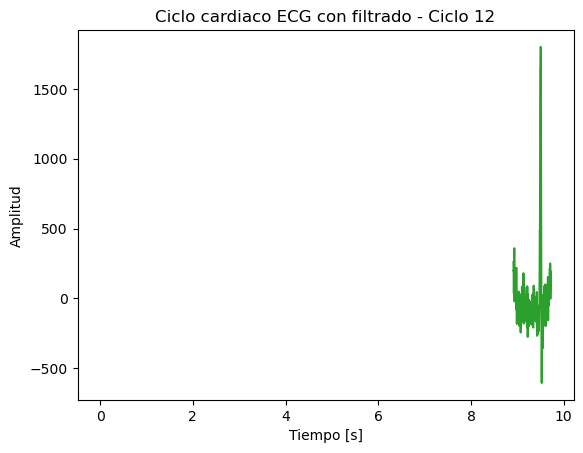

El promedio filtrado del ciclo 12 es: -6.589148532154698
La varianza es: 81612.4408810791


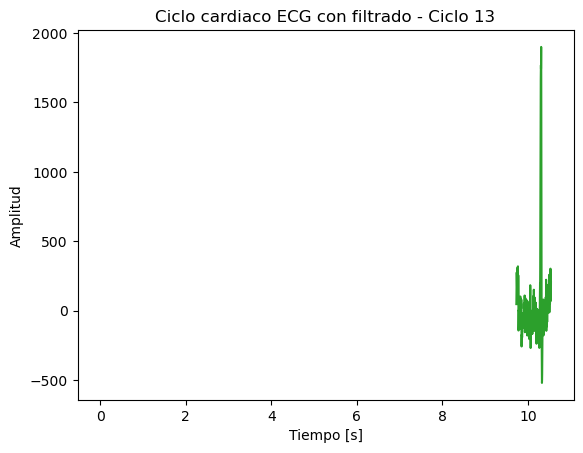

El promedio filtrado del ciclo 13 es: 17.384073241873903
La varianza es: 90675.17673464317


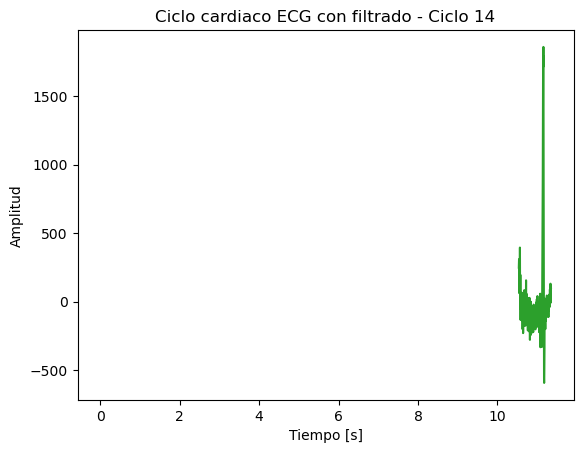

El promedio filtrado del ciclo 14 es: -16.28704309529821
La varianza es: 91360.74373754144


In [40]:
import matplotlib.pyplot as plt

n = 0
m = 830

for i in range(15):
    # Gráfico
    plt.plot(1, 2, 2)
    plt.title(f'Ciclo cardiaco ECG con filtrado - Ciclo {i+1}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.plot(vector_time[n:m], ECG_filtered_reshape[n:m])  # Ajuste de los límites de n a m
    plt.show()

    # Calcular ciclo cardiaco filtrado, promedio y varianza
    ciclo_cardiaco_filtrado = ECG_filtered_reshape[n:m]
    promedio_filtrado = ciclo_cardiaco_filtrado.mean()
    varianza_filtrado = ciclo_cardiaco_filtrado.var()

    # Imprimir resultados
    print(f"El promedio filtrado del ciclo {i+1} es: {promedio_filtrado}")
    print(f"La varianza es: {varianza_filtrado}")

    # Actualizar n y m para la siguiente iteración
    n = m
    m += 830


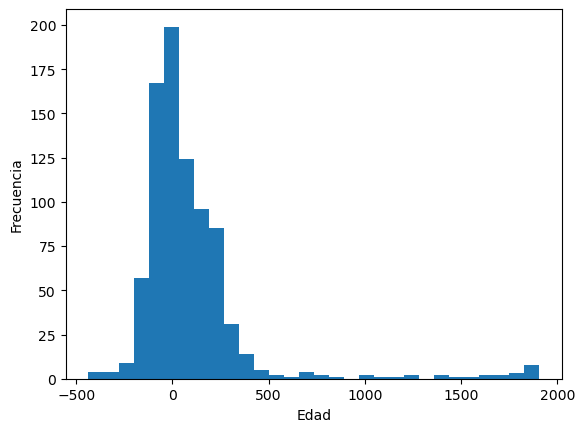

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

ciclo_cardiaco_filtrado = ECG_filtered_reshape[0:830]
promedio_filtrado = ciclo_cardiaco_filtrado.mean()
varianza_filtrado = ciclo_cardiaco_filtrado.var()

plt.hist(ECG_filtered_reshape [0:830], bins=30)
plt.ylabel('Amplitud')
plt.xlabel('Tiempo');

In [56]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors

# Supongamos que ya tienes definidos los ciclos ECG como numpy arrays
# Aquí seleccionas dos ciclos diferentes (por ejemplo, el ciclo 1 y el ciclo 5)
ciclo_1 = ECG_filtered_reshape[0:830]
ciclo_5 = ECG_filtered_reshape[3320:4150]  # Ajusta los índices para el ciclo 5

# Inicializamos las variables t_p y u_p
t_p = None
u_p = None

# 1. Prueba de Normalidad (Shapiro-Wilk o Kolmogorov-Smirnov)
# Shapiro-Wilk test
stat1, p1 = stats.shapiro(ciclo_1)
stat2, p2 = stats.shapiro(ciclo_5)

print(f'P-value ciclo 1 (Shapiro-Wilk): {p1}')
print(f'P-value ciclo 5 (Shapiro-Wilk): {p2}')

# Verificación de normalidad: p > 0.05 indica que los datos son normales
if p1 > 0.05 and p2 > 0.05:
    print("Ambos ciclos siguen una distribución normal.")
else:
    print("Al menos uno de los ciclos no sigue una distribución normal.")

# 2. Prueba de homocedasticidad (Prueba de Levene)
levene_stat, levene_p = stats.levene(ciclo_1, ciclo_5)
print(f'P-value de Levene: {levene_p}')

# Verificación de homocedasticidad: p > 0.05 indica que las varianzas son iguales
if levene_p > 0.05:
    print("Los ciclos tienen varianzas iguales (homocedasticidad).")
else:
    print("Los ciclos no tienen varianzas iguales (heterocedasticidad).")

# 3. Prueba t para muestras independientes (si se cumplen normalidad y homocedasticidad)
if p1 > 0.05 and p2 > 0.05 and levene_p > 0.05:
    t_stat, t_p = stats.ttest_ind(ciclo_1, ciclo_5)
    print(f'P-value de la prueba t: {t_p}')
    
    if t_p < 0.05:
        print("Existe una diferencia estadísticamente significativa entre los ciclos (Prueba t).")
    else:
        print("No existe una diferencia estadísticamente significativa entre los ciclos (Prueba t).")
else:
    print("No se cumplen los requisitos para la prueba t, se realizará la prueba U de Mann-Whitney.")

    # 4. Prueba no paramétrica: U de Mann-Whitney
    u_stat, u_p = stats.mannwhitneyu(ciclo_1, ciclo_5)
    print(f'P-value de la prueba U de Mann-Whitney: {u_p}')

    if u_p < 0.05:
        print("Existe una diferencia estadísticamente significativa entre los ciclos (Prueba U de Mann-Whitney).")
    else:
        print("No existe una diferencia estadísticamente significativa entre los ciclos (Prueba U de Mann-Whitney).")

# Discusión de la estacionariedad
if (t_p is not None and t_p < 0.05) or (u_p is not None and u_p < 0.05):
    print("El análisis indica una diferencia significativa entre los ciclos, lo que sugiere no estacionariedad.")
else:
    print("No hay diferencias significativas, lo que puede sugerir estacionariedad en la señal.")


P-value ciclo 1 (Shapiro-Wilk): 1.7348755817729535e-39
P-value ciclo 5 (Shapiro-Wilk): 3.996535815213101e-40
Al menos uno de los ciclos no sigue una distribución normal.
P-value de Levene: 0.03540389913712176
Los ciclos no tienen varianzas iguales (heterocedasticidad).
No se cumplen los requisitos para la prueba t, se realizará la prueba U de Mann-Whitney.
P-value de la prueba U de Mann-Whitney: 3.632347027711782e-19
Existe una diferencia estadísticamente significativa entre los ciclos (Prueba U de Mann-Whitney).
El análisis indica una diferencia significativa entre los ciclos, lo que sugiere no estacionariedad.


In [61]:
import numpy as np
from statsmodels.tsa.stattools import adfuller


ciclo_15 = ECG_filtered_reshape[11620:12450]

# Realizar la prueba de Dickey-Fuller sobre este ciclo
resultado_dickey = adfuller(ciclo_15)

# Extraer los resultados
EstadDickeyFuller = resultado_dickey[0]
valor_p = resultado_dickey[1]
lags = resultado_dickey[2]
observaciones = resultado_dickey[3]
critical_values = resultado_dickey[4]

# Imprimir los resultados
print(f'Estadístico ADF: {EstadDickeyFuller}')
print(f'valor P: {valor_p}')
print(f'Número de lags usados: {lags}')
print(f'Número de observaciones: {observaciones}')
print('Valores críticos:')
for i, n in critical_values.items():
    print(f'   {i}: {n}')

# Interpretar los resultados
if valor_p < 0.05:
    print("La señal es estacionaria según la prueba de Dickey-Fuller (p < 0.05).")
else:
    print("La señal NO es estacionaria según la prueba de Dickey-Fuller (p >= 0.05).")


Estadístico ADF: -1.869339628868725
valor P: 0.34661928487122173
Número de lags usados: 18
Número de observaciones: 811
Valores críticos:
   1%: -3.4384389256151358
   5%: -2.8651103842072048
   10%: -2.568671188193778
La señal NO es estacionaria según la prueba de Dickey-Fuller (p >= 0.05).
